<a href="https://colab.research.google.com/github/saltfish259/Salaries-for-Data-Science-jobs-EDA-/blob/main/Job_Salary_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adilshamim8/salaries-for-data-science-jobs")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/salaries-for-data-science-jobs


## DATA PREP

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/kaggle/input/salaries-for-data-science-jobs/salaries.csv")

In [ ]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151445 entries, 0 to 151444
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           151445 non-null  int64 
 1   experience_level    151445 non-null  object
 2   employment_type     151445 non-null  object
 3   job_title           151445 non-null  object
 4   salary              151445 non-null  int64 
 5   salary_currency     151445 non-null  object
 6   salary_in_usd       151445 non-null  int64 
 7   employee_residence  151445 non-null  object
 8   remote_ratio        151445 non-null  int64 
 9   company_location    151445 non-null  object
 10  company_size        151445 non-null  object
dtypes: int64(4), object(7)
memory usage: 12.7+ MB


In [ ]:
data.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


##  VISUAL GRAPH

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Tujuan Analisis 1
Mengetahui tren gaji di industri data dan AI (2020 - 2025)

In [ ]:
trend_gaji = data.groupby("work_year")['salary_in_usd'].mean().reset_index()

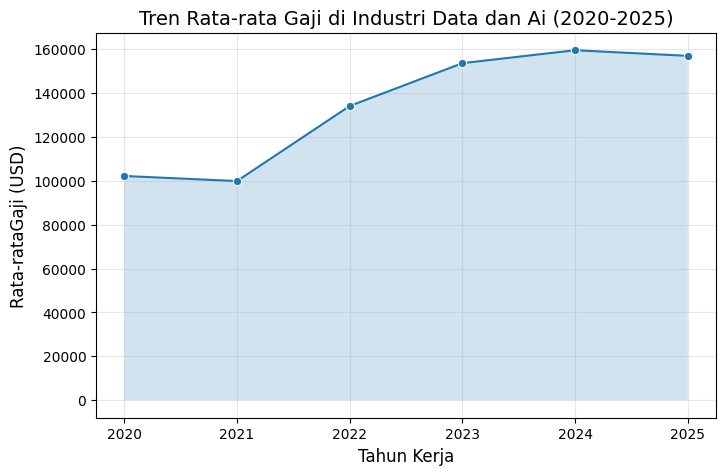

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(x="work_year",y="salary_in_usd",data=trend_gaji, marker="o")
plt.fill_between(trend_gaji["work_year"], trend_gaji["salary_in_usd"],alpha=0.2)

plt.title("Tren Rata-rata Gaji di Industri Data dan Ai (2020-2025)", fontsize =14)
plt.xlabel("Tahun Kerja", fontsize=12)
plt.ylabel("Rata-rataGaji (USD)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Kesimpulan:

Secara keseluruhan, tren gaji di industri Data dan Ai menunjukkan peningkatan dari tahun ke tahun, dengan ase pertumbuhan yang kuat pada 2021-2024. Penurunan di 2025 relatif kecil dan belum cukup mengubah arah tren positif secara keseluruhan.

#Tujuan Analisis 2
Membandingkan gaji berdasarkan faktor pekerjaan

1. Senioritas (`ecperience_level`)

In [ ]:
exp_map = {
    "EN": "Entry-level",
    "MI": "Mid-level",
    "SE": "Senior-level",
    "EX": "Executive"
}

In [ ]:
exp_salary =data.groupby("experience_level")["salary_in_usd"].mean().reset_index()

In [ ]:
exp_salary["experience_level"] = exp_salary["experience_level"].map(exp_map)

/tmp/ipython-input-689350538.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=exp_salary, x="salary_in_usd", y="experience_level", palette="viridis")


<Axes: xlabel='salary_in_usd', ylabel='experience_level'>

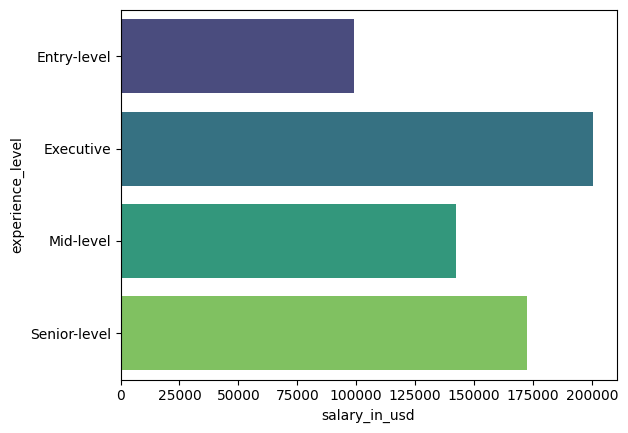

In [ ]:
sns.barplot(data=exp_salary, x="salary_in_usd", y="experience_level", palette="viridis")

2. Job Title (`job_title`)

In [ ]:
job_salary = data.groupby("job_title")["salary_in_usd"].mean().reset_index()

top_jobs = job_salary.sort_values(by="salary_in_usd", ascending=False).head(10)

/tmp/ipython-input-1450798369.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_jobs, x="salary_in_usd", y="job_title", palette="magma")


<Axes: xlabel='salary_in_usd', ylabel='job_title'>

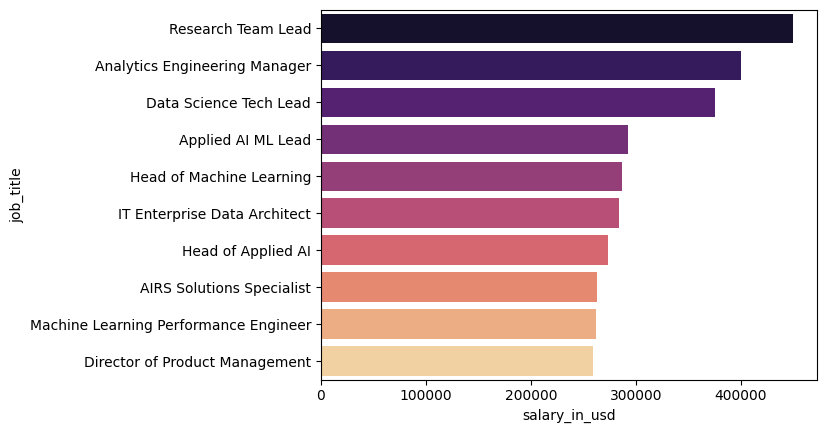

In [ ]:
sns.barplot(data=top_jobs, x="salary_in_usd", y="job_title", palette="magma")

3. Tipe Pekerja (`employment_type`)

In [ ]:
type_map = {
    "FT": "Full-time",
    "PT": "Part-time",
    "CT": "Contract",
    "FL": "Freelance"
}

In [ ]:
type_salary = data.groupby("employment_type")["salary_in_usd"].mean().reset_index()

type_salary["employment_type"] = type_salary["employment_type"].map(type_map)

/tmp/ipython-input-3373294748.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=type_salary, x="salary_in_usd", y="employment_type", palette="coolwarm")


<Axes: xlabel='salary_in_usd', ylabel='employment_type'>

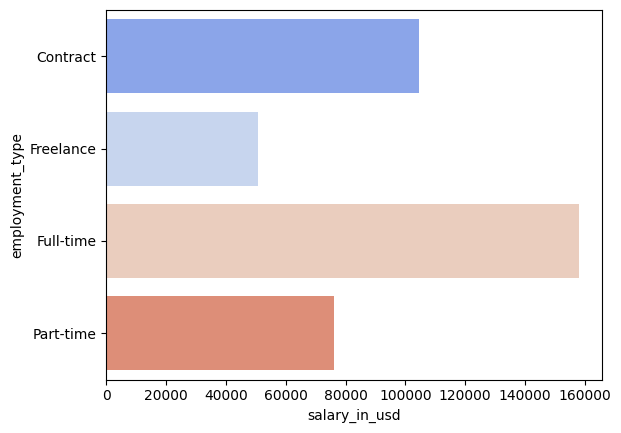

In [ ]:
sns.barplot(data=type_salary, x="salary_in_usd", y="employment_type", palette="coolwarm")

Kesimpulan:

Senioritas dan jenis pekerjaan memiliki pengaruh besar terhadap gaji di industri Data dan AI, dengan Executive dan posisi kepemimpinan teknis berada di puncak. Tipe pekerjaan full-time memberikan komensasi tahunan tertinggi dibanding tipe pekerjaan lainnya.

#Tujuan Analisis 3
Mengevaluasi pengaruh lokasi dan remote work terhadap gaji

1. Negara dengan gaji tertinggi

In [ ]:
country_salary = data.groupby("employee_residence")["salary_in_usd"].mean().reset_index()

country_salary = country_salary.sort_values(by="salary_in_usd", ascending=False)

top_countries = country_salary.head()

/tmp/ipython-input-799286377.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x="salary_in_usd", y="employee_residence", palette="crest")


<Axes: xlabel='salary_in_usd', ylabel='employee_residence'>

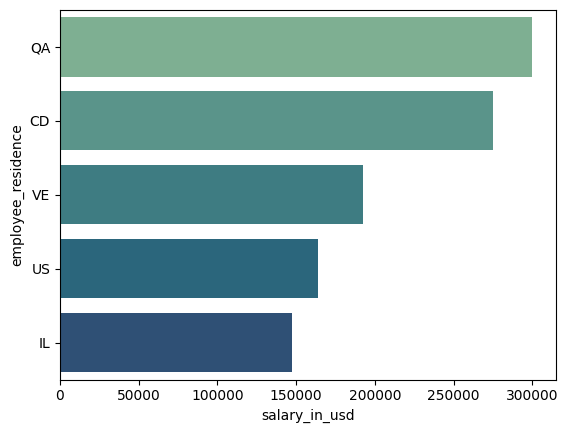

In [ ]:
sns.barplot(data=top_countries, x="salary_in_usd", y="employee_residence", palette="crest")

2. Remote ratio vs gaji

In [ ]:
remote_map = {
    0: "On-site",
    50: "Hybrid",
    100: "Remote"
}

In [ ]:
remote_salary = data.groupby("remote_ratio")["salary_in_usd"].mean().reset_index()

remote_salary["remote_ratio"] = remote_salary["remote_ratio"].map(remote_map)

/tmp/ipython-input-2061288195.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=remote_salary, x="remote_ratio", y="salary_in_usd", palette="coolwarm")


<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

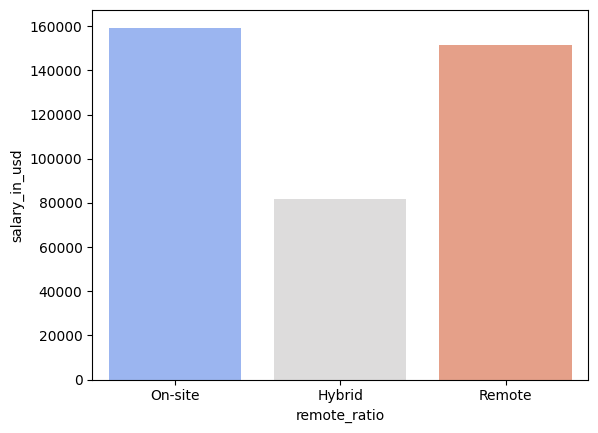

In [ ]:
sns.barplot(data=remote_salary, x="remote_ratio", y="salary_in_usd", palette="coolwarm")

Kesimpulan:

Lokasi kerja tentap menjadi faktor penting dalam menentukan besaran gaji di industri Data dan AI. Meskipun tren global menunjukkan peningkatan popularitas kerja jarak jauh, dalam dataset ini pekerjaan On-Site masih emberikan komensasi sedikit lebih tinggi dibandingkan Remote, sementara Hybrid justru jauh lebih rendah.

Insight:
Meskipun rata-rata gaji untuk tipe kerja Hybrid terlihat jauh lebih rendah dibanding On-site dan Remote, hasil ini tidak sepenuhnya representatif karena jumlah sampel Hybrid sangat kecil (329 entri) dibanding kategori lain. Selain itu, distribusi pekerja Hybrid kemungkinan terkonsentrasi pada lokasi atau pekerjaan dengan kompensasi lebih rendah.



| Remote Type | Mean (USD) | Median (USD) |   Count |
| ----------- | ---------: | -----------: | ------: |
| On-site     |    159,383 |      147,000 | 119,570 |
| Hybrid      |     81,712 |       69,999 | 329 |
| Remote      |    151,286 |      145,000 |  31,546 |
